# Projekt 1
Zbiór danych nr 3: https://www.apispreadsheets.com/datasets/122

In [2]:
import os
import urllib.request

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

plt.rcParams['figure.figsize'] = (16,6)
plt.rcParams['font.size'] = 16
sns.set_context('paper', font_scale=1.4)
sns.set_style("ticks",{'axes.grid' : True})
sns.set_palette("deep")

## Pobranie i wczytanie danych

In [3]:
# pobranie danych z internetu, zajmują ~37Mb
if not os.path.exists('smartphone_activity_dataset.csv'):
     urllib.request.urlretrieve('https://lovespreadsheet-tutorials.s3.amazonaws.com/APIDatasets/smartphone_activity_dataset.csv', filename='smartphone_activity_dataset.csv')

In [3]:
df = pd.read_csv('smartphone_activity_dataset.csv')
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_553,feature_554,feature_555,feature_556,feature_557,feature_558,feature_559,feature_560,feature_561,activity
0,0.289,-0.0203,-0.133,-0.995,-0.983,-0.914,-0.995,-0.983,-0.924,-0.935,...,-0.299,-0.710,-0.1130,0.03040,-0.465,-0.0184,-0.841,0.180,-0.0586,5
1,0.278,-0.0164,-0.124,-0.998,-0.975,-0.960,-0.999,-0.975,-0.958,-0.943,...,-0.595,-0.861,0.0535,-0.00743,-0.733,0.7040,-0.845,0.180,-0.0543,5
2,0.280,-0.0195,-0.113,-0.995,-0.967,-0.979,-0.997,-0.964,-0.977,-0.939,...,-0.391,-0.760,-0.1190,0.17800,0.101,0.8090,-0.849,0.181,-0.0491,5
3,0.279,-0.0262,-0.123,-0.996,-0.983,-0.991,-0.997,-0.983,-0.989,-0.939,...,-0.117,-0.483,-0.0368,-0.01290,0.640,-0.4850,-0.849,0.182,-0.0477,5
4,0.277,-0.0166,-0.115,-0.998,-0.981,-0.990,-0.998,-0.980,-0.990,-0.942,...,-0.351,-0.699,0.1230,0.12300,0.694,-0.6160,-0.848,0.185,-0.0439,5


### Rozmiar danych i typy zmiennych

Mamy 561 zmiennych będących liczbami przecinkowymi. Ostatnia kolumna to nasza zmienna docelowa w postaci liczby całkowitej.

In [4]:
df.shape

(10299, 562)

In [5]:
df.dtypes.value_counts()

float64    561
int64        1
dtype: int64

### Braki danych, duplikaty
Jest 10299 wierszy, zgodnie z opisem zbioru nie wystepują duplikaty ani braki danych. 

In [6]:
df.isna().sum().any()

False

In [7]:
df.drop_duplicates().shape

(10299, 562)

### Opis zmiennych
Ze względu na bardzo dużą liczbę zmiennych, ich pełny opis znajduje się w osobnym [pliku pdf](description.pdf). Jednak możemy zauważyć główny podział na zmienne dotyczące danych z **akcelometru** i **żyroskopu**.

Zmienna docelowa przyjmuje sześć kategorii, czyli liczby od 1 do 6, które możemy tłumaczyć jako kolejne aktywności człowieka:
* WALKING
* WALKING_UPSTAIRS
* WALKING_DOWNSTAIRS
* SITTING
* STANDING
* LAYING

### Podział danych
Dzielimy dane tak, aby w każdym zbiorze - do treningu, testowania i walidacji - znalazł się taki sam procent każdej klasy docelowej jak w pełnym zbiorze.

In [10]:
train, validate = train_test_split(df, test_size=0.30, random_state=2137, stratify=df['activity'])
train, test = train_test_split(train, test_size=0.30, random_state=420, stratify=train['activity'])

In [11]:
df = train.copy()

## Analiza zmiennych

### Rozkłady zmiennych zmiennoprzecinkowych

In [12]:
df_desc = df.iloc[:, :-1].describe()
df_desc

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_552,feature_553,feature_554,feature_555,feature_556,feature_557,feature_558,feature_559,feature_560,feature_561
count,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,...,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000
mean,0.274115,-0.017428,-0.108708,-0.605766,-0.508253,-0.612584,-0.631819,-0.523794,-0.614534,-0.464313,...,0.126014,-0.297046,-0.617083,0.002781,0.008771,0.026920,-0.005404,-0.496155,0.065060,-0.055257
std,0.070891,0.034293,0.057149,0.438972,0.500229,0.402230,0.413658,0.484156,0.397551,0.540229,...,0.248073,0.320383,0.310435,0.337193,0.445681,0.615743,0.481985,0.509291,0.306200,0.268674
min,-1.000000,-0.684000,-1.000000,-1.000000,-1.000000,-0.999000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-0.978000,-0.997000,-0.999000,-1.000000,-0.999000,-0.996000,-1.000000
25%,0.263000,-0.025000,-0.122000,-0.992000,-0.977000,-0.979000,-0.993000,-0.977000,-0.979000,-0.936000,...,-0.014425,-0.529000,-0.841000,-0.126750,-0.278750,-0.481000,-0.383000,-0.816000,0.001577,-0.134000
50%,0.277000,-0.017100,-0.109000,-0.936500,-0.819000,-0.839000,-0.944000,-0.828500,-0.835000,-0.870000,...,0.138500,-0.335000,-0.703000,0.007600,0.007340,0.022800,-0.001815,-0.717000,0.184000,-0.003480
75%,0.289000,-0.010500,-0.097300,-0.249000,-0.054750,-0.281000,-0.300000,-0.085200,-0.290000,-0.011800,...,0.285000,-0.116250,-0.488000,0.140000,0.294750,0.551500,0.367500,-0.516000,0.250000,0.102000
max,0.680000,0.595000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.990000,0.957000,1.000000,0.998000,0.999000,1.000000,0.935000,1.000000,1.000000


In [13]:
(df_desc.loc['min'] < -1).any()

False

In [14]:
(df_desc.loc['max'] > 1).any()

False

Wszystkie 561 zmiennych zmiennoprzecinkowych **mieści się w przedziale [-1, 1]**.

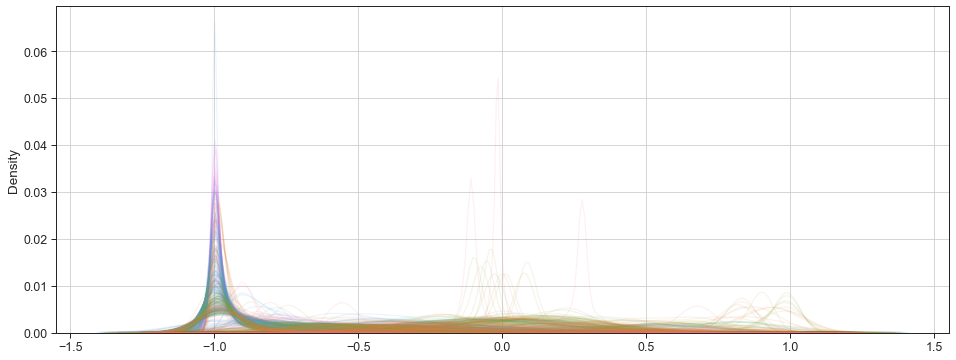

In [15]:
ax = sns.kdeplot(data=df.iloc[:, :-1], legend=False, alpha=0.1)
for line in ax.get_lines():
    line.set_alpha(0.1)
plt.show()

Wydaje się, że dużo zmiennych często przyjmuje wartości bardzo bliskie -1, przez co ich rozkład jest bardzo mocno skośny.

Niektóre zmienne są zmiennymi dyskretnymi. Przykładowo, w 12 kolumnach mamy mniej niż 50 unikalnych wartości (zbiór danych liczy ponad 5 tysięcy rekordów):

In [16]:
df_unique = df.apply(pd.Series.unique)
df_unique_cnt = df_unique.apply(len)
df_unique_cnt[df_unique_cnt <= 50]

feature_291    28
feature_292    24
feature_293    24
feature_370    45
feature_371    46
feature_372    48
feature_449    26
feature_450    28
feature_451    24
feature_512    26
feature_538    24
feature_551    49
activity        6
dtype: int64

### Klasy docelowe
Klasy docelowe są podobnej wielkości, czyli zbalansowane.

<AxesSubplot:ylabel='activity'>

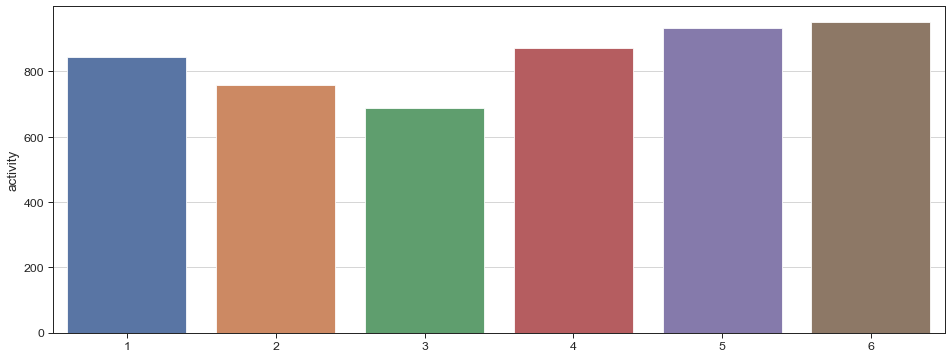

In [15]:
df_cat = data=df['activity'].value_counts().sort_index().to_frame()
sns.barplot(data=df_cat, x=df_cat.index, y='activity')

### Korelacje ze zmienną `activity`

In [3]:
df_corr = df.corr()

In [4]:
df_corr

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_553,feature_554,feature_555,feature_556,feature_557,feature_558,feature_559,feature_560,feature_561,activity
feature_1,1.000000,0.128072,-0.230328,0.004609,-0.016769,-0.036030,0.010310,-0.017470,-0.038760,0.046960,...,-0.006087,-0.002169,-0.553002,0.015760,0.036136,0.034320,-0.041054,0.034039,0.030661,-0.004497
feature_2,0.128072,1.000000,-0.029915,-0.046341,-0.046985,-0.054130,-0.045239,-0.047667,-0.055507,-0.039436,...,-0.000669,-0.002855,0.077742,-0.027572,0.013229,0.077609,-0.007518,-0.005606,-0.016230,0.037329
feature_3,-0.230328,-0.029915,1.000000,-0.024208,-0.023758,-0.015666,-0.022899,-0.022989,-0.009615,-0.040246,...,0.023110,0.023186,0.055028,-0.042151,-0.066246,-0.030737,0.003152,-0.012893,-0.028325,0.043543
feature_4,0.004609,-0.046341,-0.024208,1.000000,0.922528,0.861910,0.998661,0.916087,0.856496,0.981227,...,0.165541,0.135161,-0.034337,-0.017084,0.027459,-0.027118,-0.374103,0.449439,0.393059,-0.729099
feature_5,-0.016769,-0.046985,-0.023758,0.922528,1.000000,0.888255,0.918562,0.997510,0.887053,0.911141,...,0.220249,0.191141,-0.020811,-0.006602,0.001901,-0.015783,-0.381385,0.506122,0.425500,-0.816075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_558,0.034320,0.077609,-0.030737,-0.027118,-0.015783,-0.012185,-0.027106,-0.013406,-0.012783,-0.030903,...,-0.013063,-0.011829,-0.027495,0.023605,-0.112461,1.000000,0.024815,-0.004576,-0.012552,0.014390
feature_559,-0.041054,-0.007518,0.003152,-0.374103,-0.381385,-0.353274,-0.371169,-0.378016,-0.355844,-0.384243,...,-0.085205,-0.081957,0.008042,0.017521,-0.007100,0.024815,1.000000,-0.748247,-0.635230,0.613556
feature_560,0.034039,-0.005606,-0.012893,0.449439,0.506122,0.459099,0.444943,0.507964,0.460362,0.458845,...,0.087657,0.078005,0.003101,-0.007239,-0.006456,-0.004576,-0.748247,1.000000,0.545612,-0.605585
feature_561,0.030661,-0.016230,-0.028325,0.393059,0.425500,0.483420,0.389469,0.424472,0.480028,0.402871,...,0.058737,0.054001,-0.003234,-0.013146,-0.015371,-0.012552,-0.635230,0.545612,1.000000,-0.534107


<AxesSubplot:xlabel='activity', ylabel='Count'>

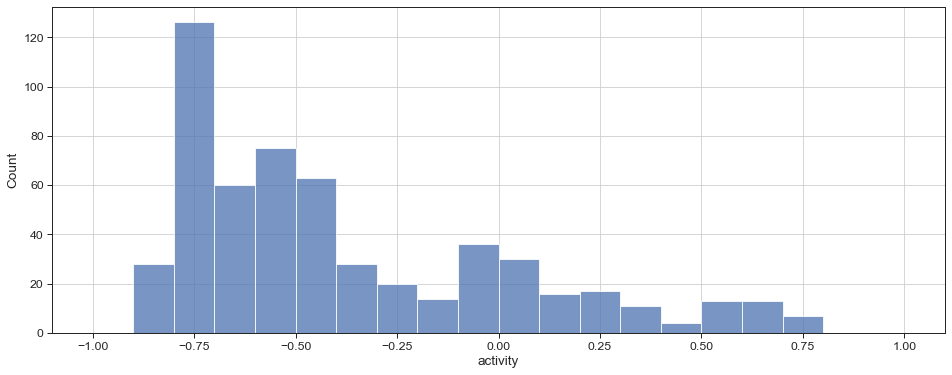

In [18]:
sns.histplot(df_corr['activity'], binwidth = 0.1, binrange=(-1, 1))

In [19]:
df_corr['activity'].sort_values(key = abs, ascending = False).head(11)

activity       1.000000
feature_103   -0.857535
feature_105   -0.855601
feature_104   -0.853485
feature_368   -0.852442
feature_235   -0.845950
feature_367   -0.844197
feature_185   -0.843215
feature_289   -0.839346
feature_524   -0.828596
feature_369   -0.828415
Name: activity, dtype: float64

Jak możemy zauważyć, bardzo dużo zmiennych jest mocno skorelowanych ze zmienną docelową `activity`.

### Korelacje między zmiennymi `feature`

Zmienne `feature` w wielu przypadkach są wzajemnie silnie skorelowane. Poniżej wykres zależności między `feature_227` a `feature_100`.

<AxesSubplot:xlabel='feature_227', ylabel='feature_100'>

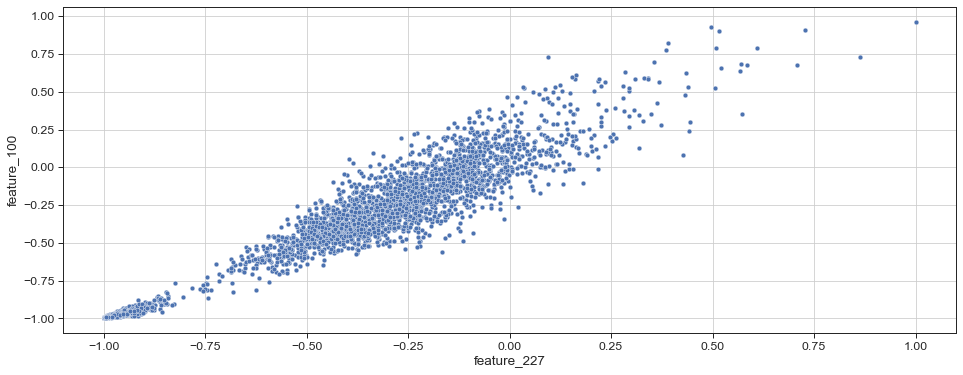

In [20]:
sns.scatterplot(data = df, x = 'feature_227', y = 'feature_100')

W niektórych przypadkach mamy do czynienia z zależnościami dającymi się opisać funkcją wymierną, np.:

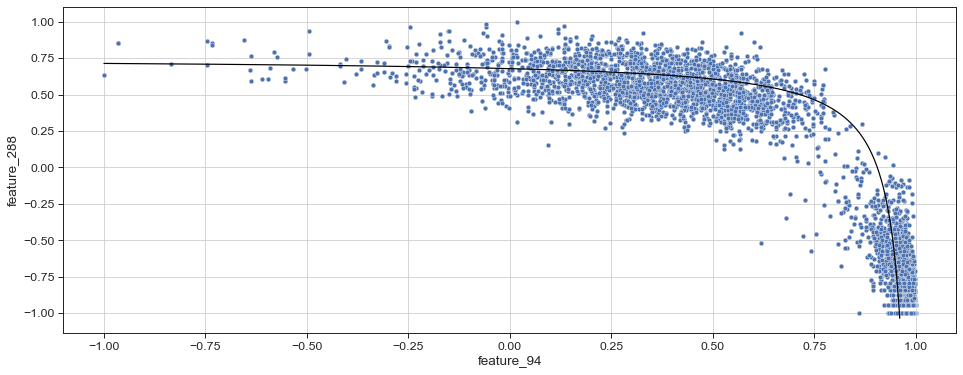

In [21]:
a = 0.05
x = np.linspace(-1, 0.96, 1000)
sns.scatterplot(data = df, x = 'feature_94', y = 'feature_288')
plt.plot(x, (21*x-19)/(28*x-28), color = 'black')

Co najmniej kilkanaście tysięcy par zmiennych jest silnie skorelowanych.

<AxesSubplot:ylabel='Count'>

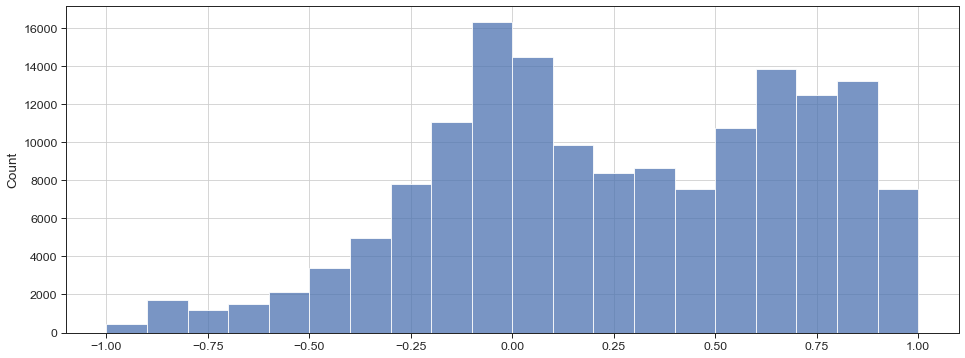

In [22]:
sns.histplot(df_corr.iloc[:-1, :-1].values[np.triu_indices_from(df_corr.iloc[:-1, :-1], k = 1)], binwidth = 0.1, binrange=(-1, 1))

Okazuje się, że dla prawie 70% kolumn istnieje taka inna kolumna, że współczynnik korelacji (z dokładnością do wartości bezwzględnej) między tymi kolumnami przekracza 0.95.

In [23]:
df_corr_temp = df_corr.copy()
np.fill_diagonal(df_corr_temp.values, np.nan)
(df_corr_temp.abs().max() > 0.95).value_counts(normalize = True)

True     0.69573
False    0.30427
dtype: float64

Co więcej, aż 40 kolumn ma inną kolumnę skorelowaną z nią ze współczynnikiem 1 lub -1.

In [24]:
(df_corr_temp.abs().max() == 1).value_counts()

False    522
True      40
dtype: int64

Przykładowo, wartości zmiennych `feature_542` oraz `feature_547` są w każdym wierszu identyczne:

In [25]:
(df['feature_542'] == df['feature_547']).all()

True

### Rozkład klas ze względu na wybrane zmienne

Na podstawie poniższego wykresu możemy wysnuć hipotezę, że klasa jest równa 6 wtedy i tylko wtedy, gdy `feature_53` ma wartość ujemną, a w pozostałych przypadkach przyjmuje wartość 4 lub 5 (dla `feature_104` mniejszego od 0.125) albo 1, 2, 3 (w pozostałych przypadkach).

<AxesSubplot:xlabel='feature_53', ylabel='feature_104'>

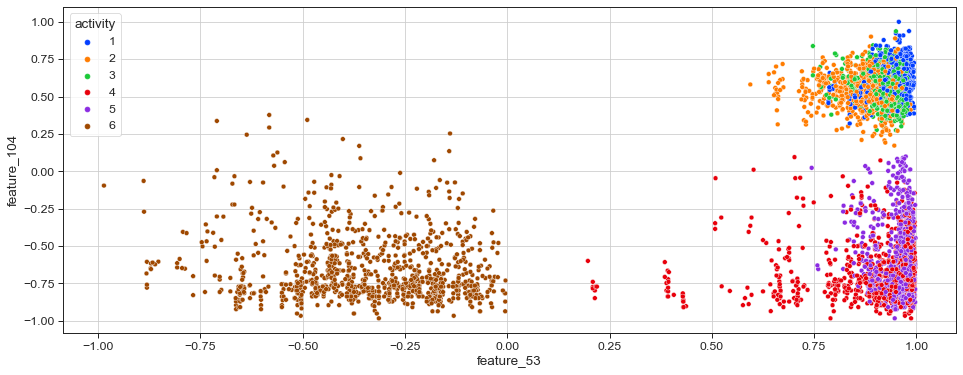

In [26]:
sns.scatterplot(data = df, x = 'feature_53', y = 'feature_104', hue = 'activity', palette = sns.color_palette("bright")[:6])

Poniżej przekonujemy się, że tak jest w istocie:

In [27]:
((df['feature_53'] < 0) == (df['activity'] == 6)).all()

True

In [28]:
(((df['feature_53'] >= 0) & (df['feature_104'] < 0.125)) == (df['activity'].isin([4, 5]))).all()

True

In [29]:
(((df['feature_53'] >= 0) & (df['feature_104'] >= 0.125)) == (df['activity'].isin([1, 2, 3]))).all()

True

Dla każdego rekordu jesteśmy więc w stanie bezproblemowo rozstrzygnąć, do którego z podzbiorów klas on należy ($1,2,3$ albo $4,5$ albo $6$), a jedyną trudnością wydaje się prawidłowe sklasyfikowanie go w pierwszych dwóch przypadkach spośród pozostałych dwóch lub trzech możliwości.

Rozbijmy zatem nasz zbiór danych:

In [30]:
df_1_2_3 = df[df['activity'].isin([1, 2, 3])].copy()
df_4_5 = df[df['activity'].isin([4, 5])].copy()

#### Zależność 4 vs. 5

Sprawdźmy, jaka jest zależność między zmiennymi `feature` a faktem, czy dany rekord należy do klasy $4$, czy też $5$ (współczynniki korelacji podajemy z dokładnością co do wartości bezwzględnej).

In [31]:
df_4_5['is_5'] = (df_4_5['activity'] == 5) * 1
df_4_5_corr = df_4_5.corr()

In [32]:
df_4_5_corr['is_5'].abs().sort_values(ascending = False).head(12)

is_5           1.000000
activity       1.000000
feature_51     0.678976
feature_42     0.678467
feature_560    0.670947
feature_54     0.662100
feature_452    0.491063
feature_78     0.470079
feature_52     0.443437
feature_561    0.443210
feature_43     0.442507
feature_64     0.432593
Name: is_5, dtype: float64

Wykresy zależności wybranych zmiennych od klasy:

<AxesSubplot:xlabel='feature_51', ylabel='Density'>

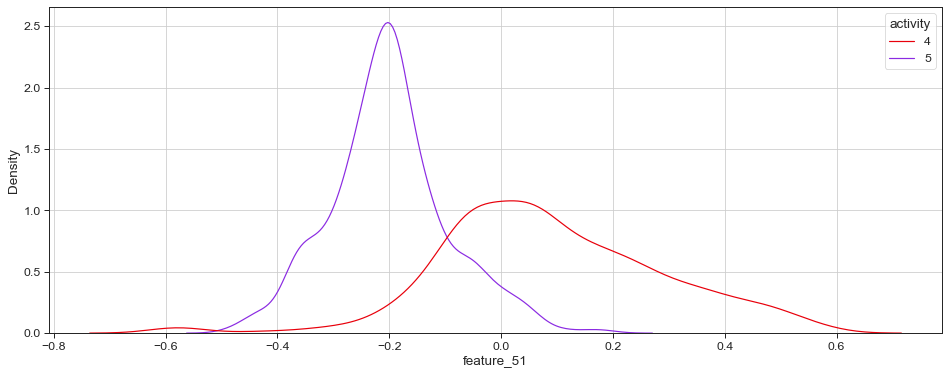

In [33]:
sns.kdeplot(data = df_4_5, x = 'feature_51', hue = 'activity', palette = sns.color_palette("bright")[3:5])

<AxesSubplot:xlabel='feature_560', ylabel='feature_452'>

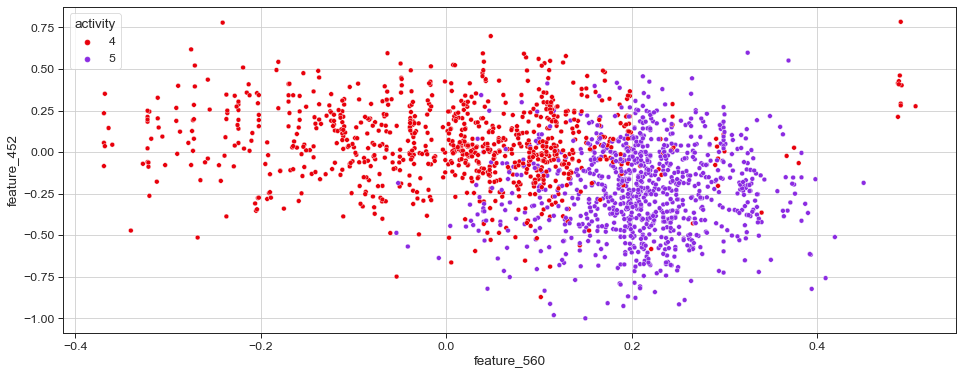

In [34]:
sns.scatterplot(data = df_4_5, x = 'feature_560', y = 'feature_452', hue = 'activity', palette = sns.color_palette("bright")[3:5])

#### Zależność 1 vs. 2 vs. 3

In [35]:
df_1_2_3['is_1'] = (df_1_2_3['activity'] == 1) * 1
df_1_2_3['is_2'] = (df_1_2_3['activity'] == 2) * 1
df_1_2_3['is_3'] = (df_1_2_3['activity'] == 3) * 1
df_1_2_3_corr = df_1_2_3.corr()

In [36]:
df_1_2_3_corr['is_1'].abs().sort_values(ascending = False).head(10)

is_1           1.000000
activity       0.873472
feature_66     0.654417
feature_67     0.648682
feature_68     0.634831
feature_69     0.610711
feature_223    0.591630
feature_210    0.591630
feature_504    0.573891
feature_506    0.539502
Name: is_1, dtype: float64

In [37]:
df_1_2_3_corr['is_2'].abs().sort_values(ascending = False).head(10)

is_2           1.000000
feature_70     0.654079
feature_71     0.647903
feature_74     0.636818
feature_72     0.624737
feature_75     0.623466
feature_296    0.622285
feature_76     0.601302
feature_73     0.577355
feature_299    0.572307
Name: is_2, dtype: float64

In [38]:
df_1_2_3_corr['is_3'].abs().sort_values(ascending = False).head(10)

is_3           1.000000
activity       0.859002
feature_509    0.760147
feature_215    0.756922
feature_202    0.756922
feature_505    0.756708
feature_504    0.748789
feature_10     0.734563
feature_216    0.733798
feature_203    0.733798
Name: is_3, dtype: float64

<AxesSubplot:xlabel='feature_66', ylabel='Density'>

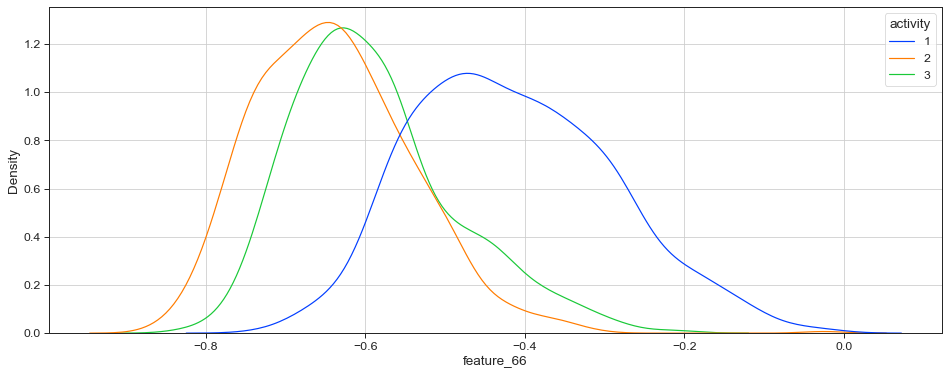

In [39]:
sns.kdeplot(data = df_1_2_3, x = 'feature_66', hue = 'activity', palette = sns.color_palette("bright")[:3])

<AxesSubplot:xlabel='feature_10', ylabel='Density'>

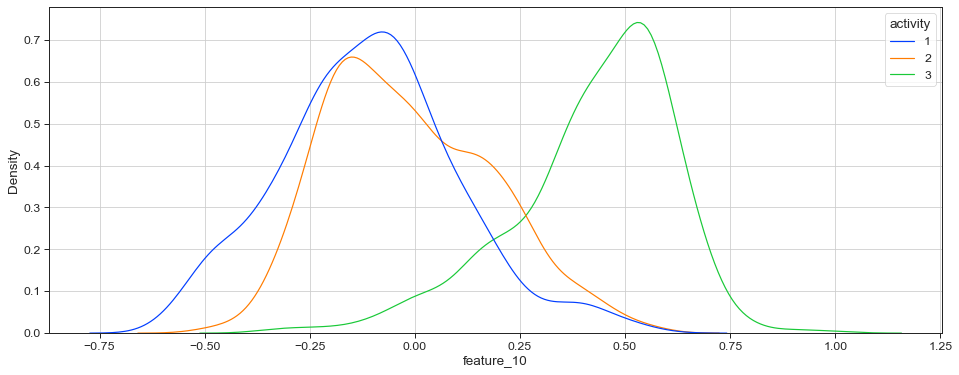

In [40]:
sns.kdeplot(data = df_1_2_3, x = 'feature_10', hue = 'activity', palette = sns.color_palette("bright")[:3])

<AxesSubplot:xlabel='feature_71', ylabel='feature_10'>

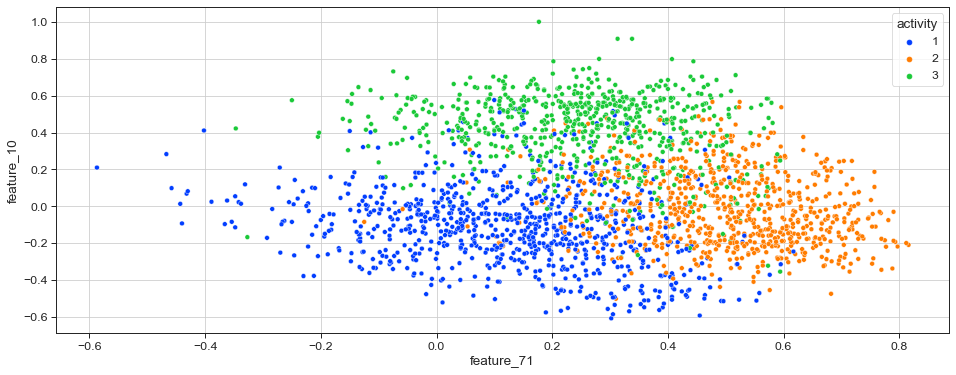

In [41]:
sns.scatterplot(data = df_1_2_3, x='feature_71',y='feature_10', hue = 'activity', palette = sns.color_palette("bright")[:3])

<AxesSubplot:xlabel='feature_202', ylabel='feature_235'>

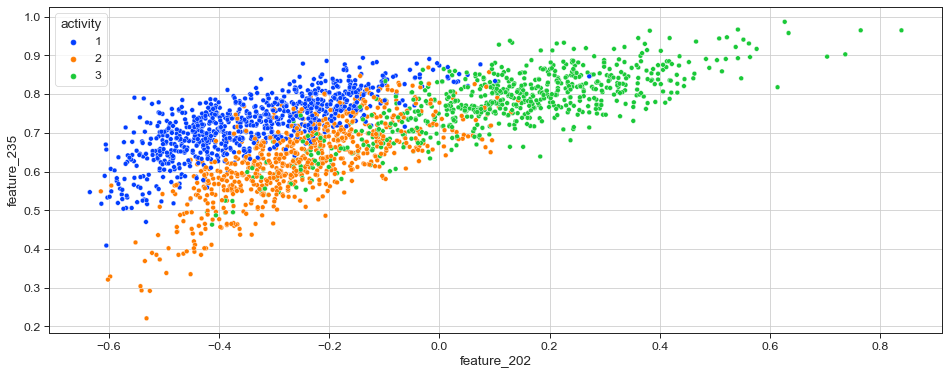

In [42]:
sns.scatterplot(data = df_1_2_3, x='feature_202',y='feature_235', hue = 'activity', palette = sns.color_palette("bright")[:3])

## Feature selection
W zbiorze danych jest bardzo dużo kolumn. Zostało bardzo ładnie pokazane, że przewidywanie klasy docelowej możemy oprzeć na wybranej części zmiennych. Dlatego też spróbujemy ograniczyć liczbę kolumn.

W tym celu przygotujemy dwa własne transformatory danych.

### Usunięcie kolumn silnie skorelowanych

Kolumny możemy podzielić na silnie skorelowane grupy. Z każdej grupy zostawimy tylko jedną kolumnę. Za silną korelację uznajemy domyślnie korelację na poziomie większym niż $0.95$.

In [18]:
class CorrelatedColumnsRemover(BaseEstimator, TransformerMixin):
    def __init__(self, threshold = 0.95):
        self.threshold = threshold
        self.removed_columns_ = None
    
    def fit(self, X, y=None):
        corr = X.corr()
        np.fill_diagonal(corr.values, 0)

        saved = set()
        to_remove = set()

        for col in corr:
            if col in to_remove:
                continue
            saved.add(col)
            group = set(corr.loc[corr[col].abs() > self.threshold, col].index)
            for feature in group:
                if feature not in saved:
                    to_remove.add(feature)
                    
        self.removed_columns_ = to_remove
        return self # nothing else to do

    def transform(self, X, y=None):
        return X.drop(columns=self.removed_columns_, errors='ignore')

In [19]:
ccr = CorrelatedColumnsRemover()
ccr.fit_transform(df.drop(columns=['activity']))

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_12,feature_15,feature_17,feature_19,...,feature_540,feature_545,feature_546,feature_551,feature_552,feature_553,feature_555,feature_556,feature_557,feature_558
3929,0.326,-0.0303,-0.1920,0.7330,0.473,0.465,0.115,-0.444,0.499,-0.0375,...,-0.316,0.451,-0.498,-0.841,0.1150,-0.18900,-0.3550,-0.1900,0.8690,0.2370
6669,0.284,-0.0187,-0.1090,-0.9960,-0.983,-0.987,-0.818,0.835,-1.000,-1.0000,...,-0.266,-0.997,-0.998,-1.000,0.1580,-0.48200,-0.4210,0.0807,-0.3700,-0.7650
9075,0.197,0.1430,-0.1650,-0.9570,-0.682,-0.820,-0.806,0.709,-0.998,-0.9790,...,-0.430,-0.966,-0.960,-1.000,-0.0601,0.00865,-0.0224,0.1530,-0.4270,0.0103
3068,0.271,-0.0130,-0.1390,-0.9960,-0.980,-0.982,-0.825,0.827,-1.000,-0.9980,...,-0.280,-0.996,-0.994,-1.000,0.3960,-0.64300,0.0244,-0.1420,-0.8830,0.4600
1496,0.277,-0.0160,-0.1090,-0.9970,-0.984,-0.951,-0.800,0.830,-1.000,-0.9980,...,-0.565,-0.998,-0.994,-0.619,0.3600,-0.51800,0.2250,0.2360,0.2240,0.0720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6483,0.278,-0.0159,-0.0986,-0.9970,-0.982,-0.970,-0.808,0.831,-1.000,-0.9990,...,-0.225,-0.995,-0.995,-0.841,0.3820,-0.56400,0.0700,-0.4880,-0.9820,0.1040
7671,0.272,-0.0364,-0.1460,-0.9960,-0.949,-0.925,-0.813,0.795,-1.000,-0.9940,...,-0.275,-0.996,-0.982,-0.429,0.3290,-0.68100,0.1190,-0.0604,-0.0586,0.1140
670,0.311,-0.0252,-0.1470,-0.2980,-0.105,-0.373,-0.412,0.543,-0.752,-0.8180,...,-0.541,-0.612,-0.791,-0.905,0.1120,0.37500,-0.4480,0.7580,0.9420,-0.6770
1664,0.276,-0.0154,-0.1100,-0.9950,-0.988,-0.981,-0.823,0.836,-1.000,-1.0000,...,-0.506,-0.999,-0.997,-0.714,0.4190,-0.73000,0.0713,-0.0940,0.2370,0.2190


In [20]:
len(ccr.removed_columns_)

284

Jak widzimy, `CorrelatedColumnsRemover` usuwa nam ok. 284 kolumny. W wyjściowej ramce danych żadna kolumna nie jest skorelowana z drugą na poziomie wyższym niż $0.95$.

### SelectFromModel
Wybieramy tylko te kolumny, których ważność (`importance weight`) przyznana przez pewien model była powyżej średniej. W tym celu wykorzystamy transformer `SelectFromModel` z pakietu `sklearn`. Domyślnym modelem będzie `ExtraTreeClassifier`.

In [21]:
class ImportantColumnsSelector(BaseEstimator, TransformerMixin):
    def __init__(self, estimator = ExtraTreesClassifier(n_estimators=50, random_state=2137)):
        self.estimator = estimator
        self.selected_columns_idx_ = None
    
    def fit(self, X, y=None):
        sfm = SelectFromModel(self.estimator, threshold='mean').fit(X, y)
        self.selected_columns_idx_ = sfm.get_support(indices=True)
        return self

    def transform(self, X, y=None):
        return X.iloc[:, self.selected_columns_idx_]

In [22]:
ics = ImportantColumnsSelector()
tmp = ics.fit_transform(df.drop(columns=['activity']), df['activity'])
tmp.shape

(5046, 132)

<AxesSubplot:>

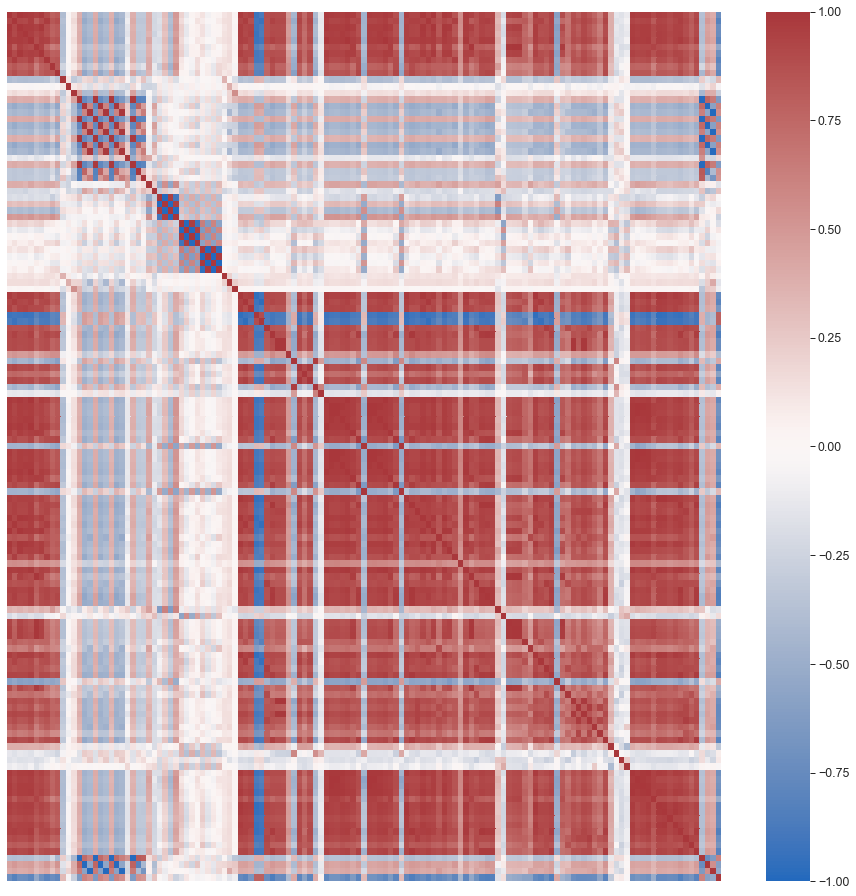

In [23]:
tmp['activity'] = df['activity']
plt.figure(figsize = (16,16))
sns.heatmap(tmp.corr(), annot=False, cmap="vlag", vmin=-1, vmax=1, center=0, fmt=".2f", xticklabels=False, yticklabels=False)

Jak widzimy, model `ExtraTreeClassifier` (który swoją drogą korzysta z Gini jako miary nieczystości) wybiera ok. 130 kolumn. Ta wartość może się zmieniać w zależności od przekazanych parametrów. Co ciekawe, jeśli spojrzymy na macierz korelacji (ostatni wiersz to klasa docelowa `activity`), to dużo zmiennych jest docyć mocno skorelowanych ze sobą. Ponadto, wybierane są kolumny słabo skorelowane ze zmienną docelową.

## Podsumowanie
* dane zawierają 561 zmiennych, 10299 obesrwacji i jedną docelową kolumnę `activity`
* nie ma żadnych braków danych
* wszystkie zmienne są w postaci liczb zmiennoprzecinkowych z przedziału $[-1, 1]$, zatem dane nie wymagają skalowania
* jest 6 klas docelowych, które są zrównoważone - każdej z nich odpowiada podobna liczba obserwacji
* zmienne są bardzo często silnie skorelowane, czy to między sobą, czy z klasą docelową; wydaje się, że na podstawie kilku zmiennych można wręcz jednoznacznie wyznaczyć klasę docelową
* możemy zatem rozważyć pozbycie się części zmiennych; podczas trenowania modelu będzie można sprawdzić, które podejście:
    * usunięcie silnie skorelowanych kolumn (`CorrelatedColumnsRemover`);
    * wybór kolumn zaproponowanych przez jakiś model (`SelectFromModel`);
    * zostawienie wszystkich kolumn tak jak są;
    
    okaże się najlepsze 

